In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import squidpy as sq
import anndata as ad

import scipy.sparse as sparse
from scipy.io import mmread
from scipy.stats import pearsonr, pointbiserialr

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.lines import Line2D

import seaborn as sns
import scanpy as sc
sc.logging.print_header()
sc.set_figure_params(facecolor="white", figsize=(8, 8))
sc.settings.verbosity = 1 # errors (0), warnings (1), info (2), hints (3)
plt.rcParams["font.family"] = "Arial"
sns.set_style("white")

import random #seeds affect the umap clusters and leiden partition
seed = 1234
np.random.seed(seed)
random.seed(seed)

from rpy2.robjects import pandas2ri
import rpy2.robjects as ro

/opt/homebrew/Caskroom/miniconda/base/envs/banksy_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.2 anndata==0.10.9 umap==0.5.6 numpy==1.26.4 scipy==1.14.1 pandas==2.2.2 scikit-learn==1.5.1 statsmodels==0.14.2 igraph==0.11.6 pynndescent==0.5.13


In [2]:
# load adata object
adata = ad.read_h5ad("/PATH/spatial_obj.h5ad")

In [3]:
# check object
print(adata.obsm['spatial'].shape)

(167132, 2)


In [4]:
# split the 'spatial' array into x and y coordinates and add them to adata.obs
adata.obs['xcoord'] = adata.obsm['spatial'][:, 0]  # X coordinates
adata.obs['ycoord'] = adata.obsm['spatial'][:, 1]  # Y coordinates

# concatenate 'xcoord' and 'ycoord' into a new array
adata.obsm['coord_xy'] = np.column_stack((adata.obs['xcoord'], adata.obs['ycoord']))

In [6]:
from banksy.main import median_dist_to_nearest_neighbour

# define coordinate keys for Xenium data (update as per your spatial keys)
coord_keys = ('xcoord', 'ycoord', 'spatial')  # Adjust this if 'spatial' is different in your data

# set params
# ==========
plot_graph_weights = True
k_geom = 15 # number of spatial neighbours
max_m = 1 # use both mean and AFT
nbr_weight_decay = "scaled_gaussian" # can also choose "reciprocal", "uniform" or "ranked"

# find median distance to closest neighbours
nbrs = median_dist_to_nearest_neighbour(adata, key = coord_keys[2])



Median distance to closest cell = 7.40069319759621

---- Ran median_dist_to_nearest_neighbour in 0.28 s ----




Median distance to closest cell = 7.40069319759621

---- Ran median_dist_to_nearest_neighbour in 0.28 s ----


Median distance to closest cell = 7.40069319759621

---- Ran median_dist_to_nearest_neighbour in 0.28 s ----

---- Ran generate_spatial_distance_graph in 0.73 s ----

---- Ran row_normalize in 0.25 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 2.43 s ----

----- Plotting Edge Histograms for m = 0 -----

Edge weights (distances between cells): median = 18.74052906609729, mode = 15.87097127116702

---- Ran plot_edge_histogram in 0.16 s ----


Edge weights (weights between cells): median = 0.05831769291050545, mode = 0.032539542442893116

---- Ran plot_edge_histogram in 0.04 s ----

---- Ran generate_spatial_distance_graph in 1.15 s ----

---- Ran theta_from_spatial_graph in 0.76 s ----

---- Ran row_normalize in 0.25 s ----

---- Ran generate_spatial_weights_fixed_nbrs in 3.74 s ----

----- Plotting Edge Histograms for m = 1 -----

Edge weights (distances between cell

/opt/homebrew/Caskroom/miniconda/base/envs/banksy_env/lib/python3.12/site-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/opt/homebrew/Caskroom/miniconda/base/envs/banksy_env/lib/python3.12/site-packages/numpy/lib/histograms.py:841: ComplexWarning: Casting complex values to real discards the imaginary part
  indices = f_indices.astype(np.intp)
/opt/homebrew/Caskroom/miniconda/base/envs/banksy_env/lib/python3.12/site-packages/matplotlib/axes/_axes.py:7004: ComplexWarning: Casting complex values to real discards the imaginary part
  bins = np.array(bins, float)  # causes problems if float16
/opt/homebrew/Caskroom/miniconda/base/envs/banksy_env/lib/python3.12/site-packages/matplotlib/cbook.py:1398: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)



Edge weights (weights between cells): median = (9.209048940441578e-06-0.019361646530822216j), mode = -0.011225772053225544

---- Ran plot_edge_histogram in 0.24 s ----

----- Plotting Weights Graph -----
Maximum weight: 0.20337214026807945

---- Ran plot_graph_weights in 10.49 s ----

Maximum weight: (0.0909956530023044-0.00047678688002336254j)

---- Ran plot_graph_weights in 20.35 s ----

----- Plotting theta Graph -----


/opt/homebrew/Caskroom/miniconda/base/envs/banksy_env/lib/python3.12/site-packages/matplotlib/collections.py:426: ComplexWarning: Casting complex values to real discards the imaginary part
  renderer.draw_path_collection(


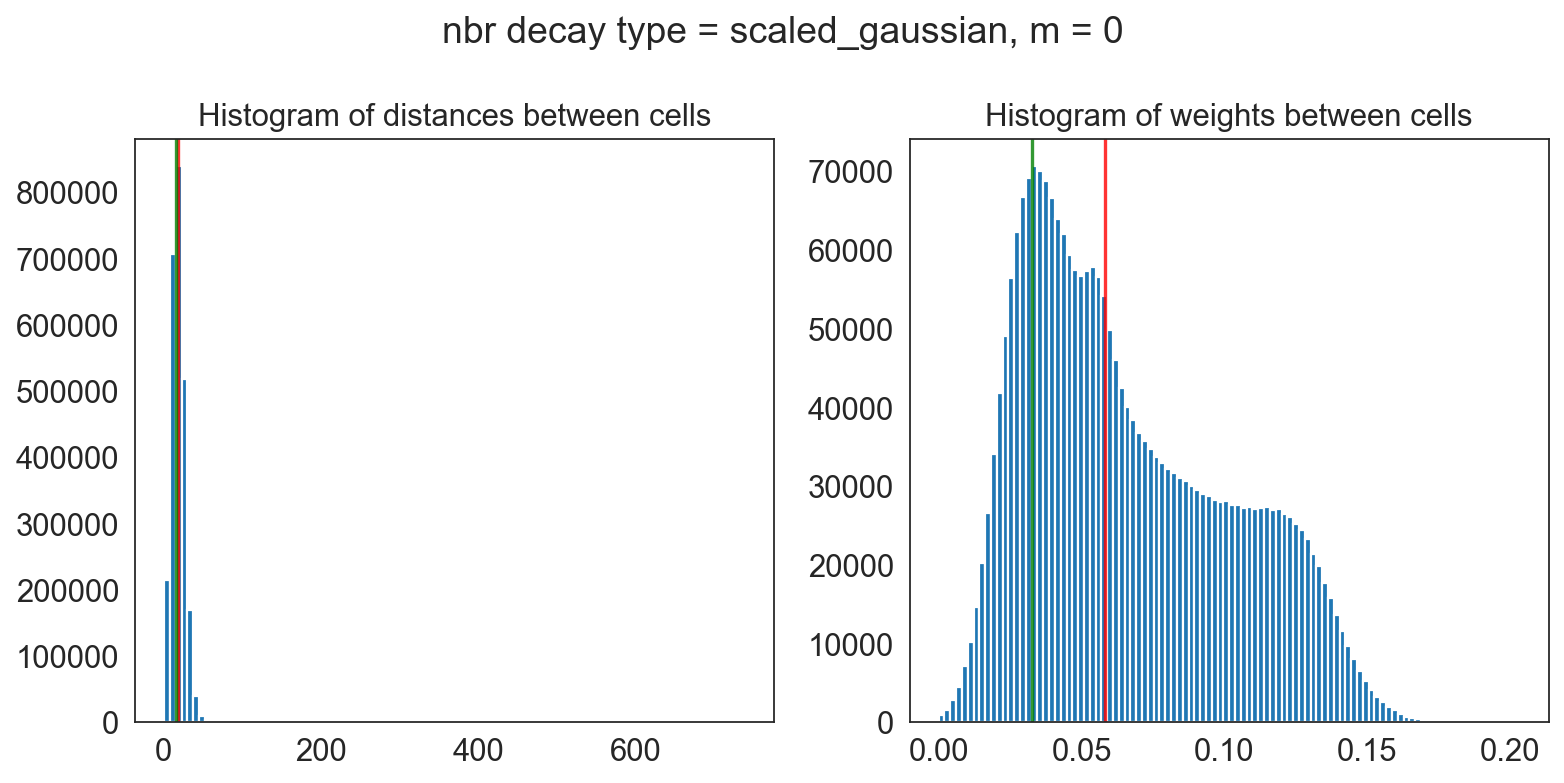

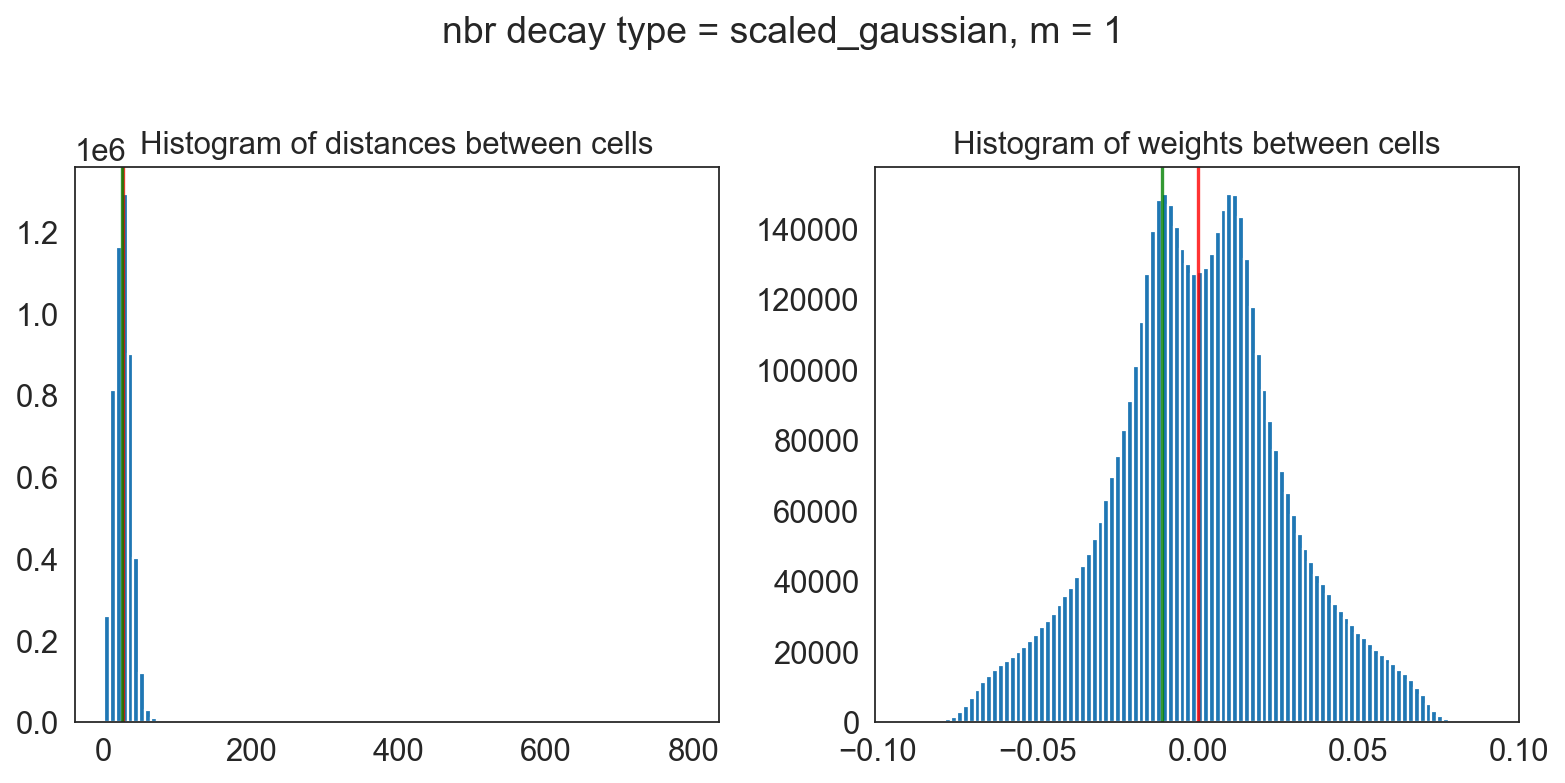

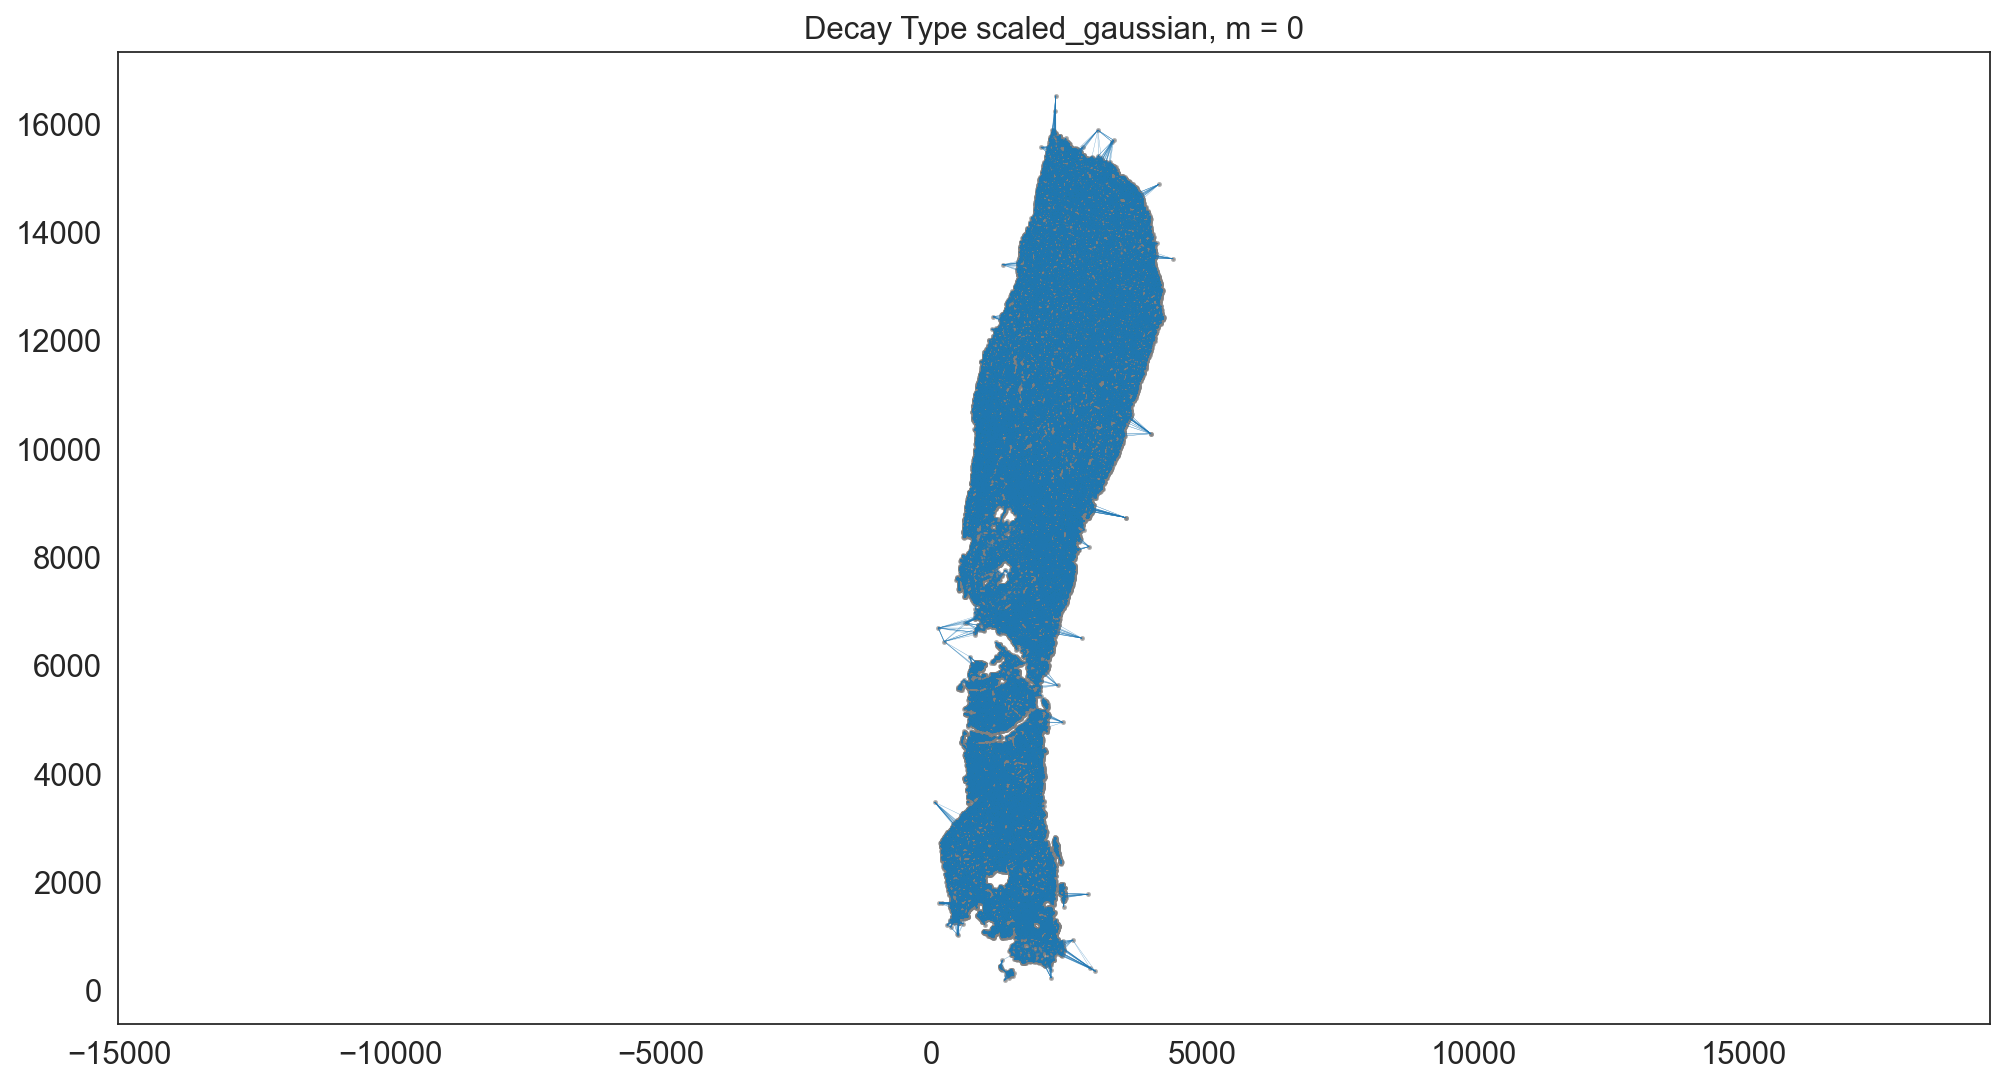

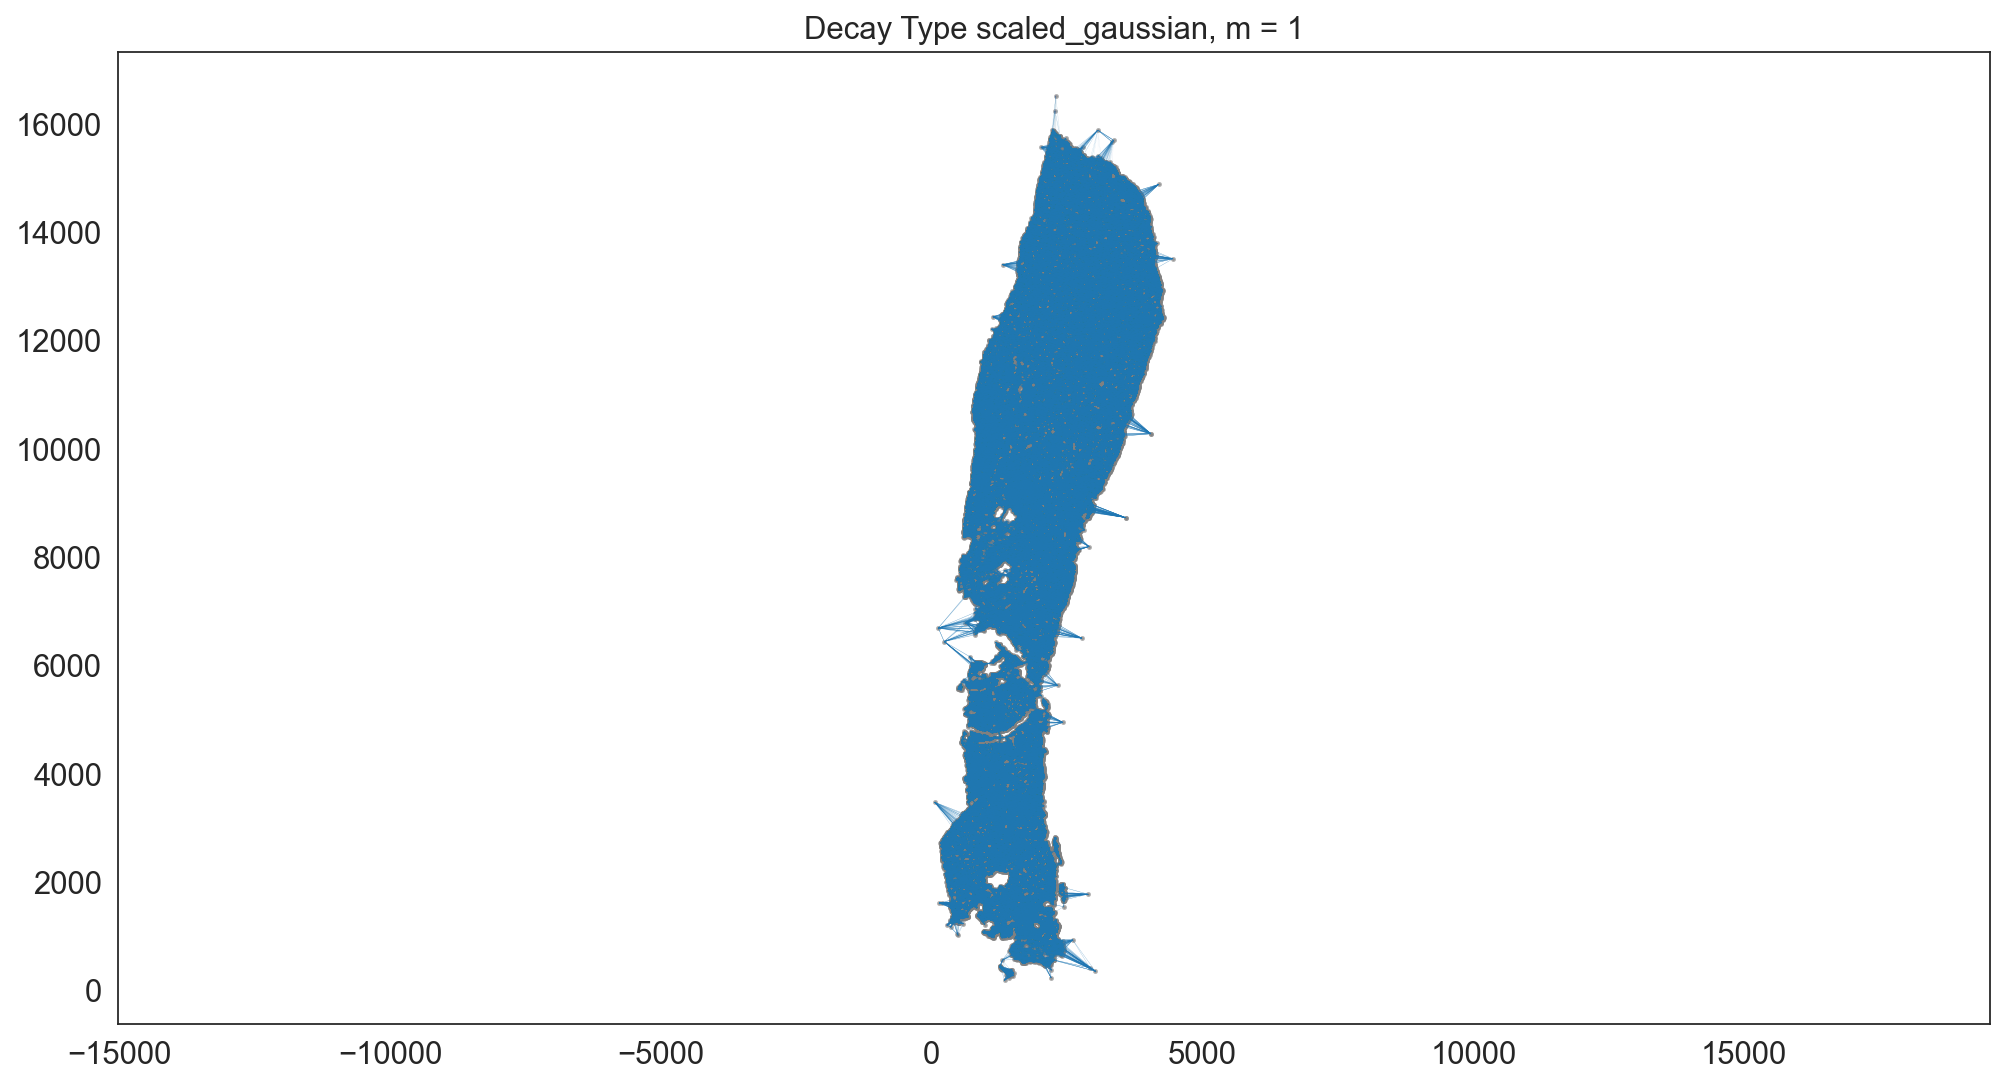

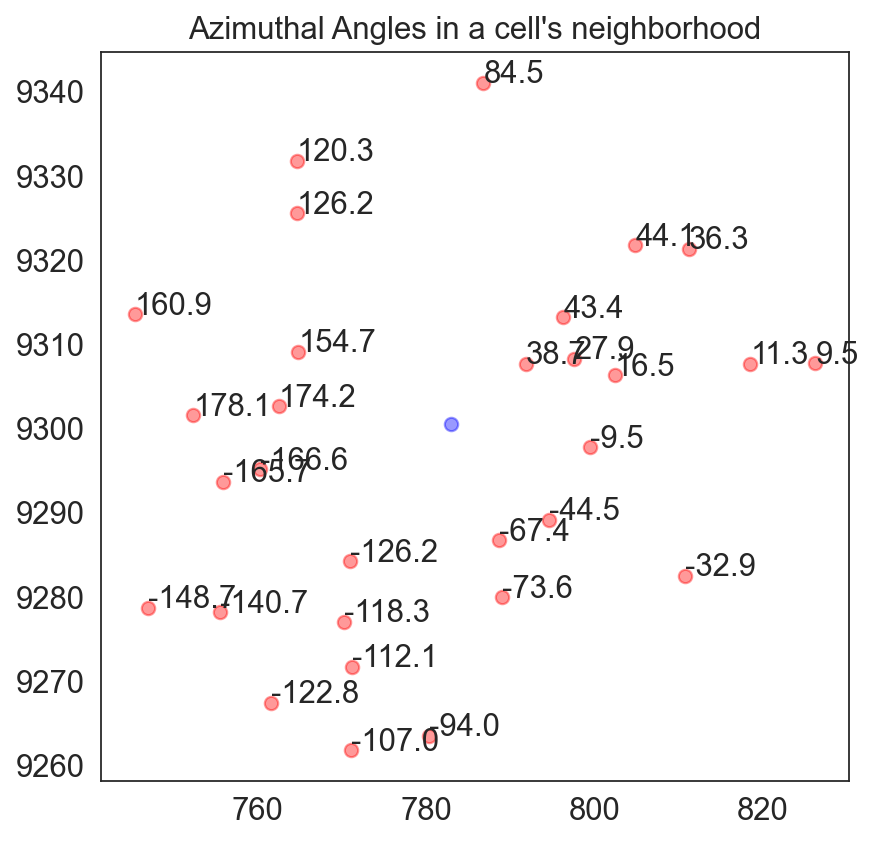

In [8]:
# run banksy
from banksy.initialize_banksy import initialize_banksy

coord_keys = ('xcoord', 'ycoord', 'spatial')  # update as per Xenium's spatial key format
nbrs = median_dist_to_nearest_neighbour(adata, key=coord_keys[2])

banksy_dict = initialize_banksy(
    adata,
    coord_keys,
    nbr_weight_decay="scaled_gaussian",
    max_m=1,
    plt_edge_hist=True,
    plt_nbr_weights=True,
    plt_agf_angles=False,
    plt_theta=True
)

In [9]:
# generate matrix
from banksy.embed_banksy import generate_banksy_matrix

resolutions = [0.7]
pca_dims = [20]
lambda_list = [0.8]

banksy_dict, banksy_matrix = generate_banksy_matrix(
    adata,
    banksy_dict,
    lambda_list,
    max_m
)

Runtime Nov-06-2024-15-23

300 genes to be analysed:
Gene List:
Index(['ACSM2B', 'ACTA2', 'ACTG2', 'ADAMTS1', 'ADAMTS6', 'ADGRE2', 'ADGRL3',
       'AGTR1', 'ALDH1A2', 'ANO3',
       ...
       'TRPM6', 'TRPV5', 'UMOD', 'UNC5C', 'UNC5D', 'VCAM1', 'VEGFC', 'VIM',
       'WFDC2', 'WNT5B'],
      dtype='object', length=300)

Check if X contains only finite (non-NAN) values
Decay Type: scaled_gaussian
Weights Object: {'weights': {0: <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2506980 stored elements and shape (167132, 167132)>, 1: <Compressed Sparse Row sparse matrix of dtype 'complex128'
	with 5013960 stored elements and shape (167132, 167132)>}}

Nbr matrix | Mean: 0.07 | Std: 0.18
Size of Nbr | Shape: (167132, 300)
Top 3 entries of Nbr Mat:

[[0.         0.         0.16881324]
 [0.01943767 0.         0.0965921 ]
 [0.02847112 0.         0.07042767]]

AGF matrix | Mean: 0.03 | Std: 0.05
Size of AGF mat (m = 1) | Shape: (167132, 300)
Top entries of AGF:
[[0.00318067 0.   

In [10]:
from banksy.main import concatenate_all

banksy_dict["nonspatial"] = {
    # here we simply append the nonspatial matrix (adata.X) to obtain the nonspatial clustering results
    0.0: {"adata": concatenate_all([adata.X], 0, adata=adata), }
}

print(banksy_dict['nonspatial'][0.0]['adata'])

Scale factors squared: [1.]
Scale factors: [1.]
AnnData object with n_obs × n_vars = 167132 × 300
    obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'v2.subclass.l1', 'v2.subclass.l2', 'sample_id', 'library_id', 'Panel', 'PPID', 'Condition', 'sample_source', 'time_interval', 'region', 'full_id', 'xcoord', 'ycoord'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'is_nbr', 'k'


In [11]:
# import pca umap
from banksy_utils.umap_pca import pca_umap

pca_umap(banksy_dict,
         pca_dims = pca_dims,
         add_umap = True,
         plt_remaining_var = False,
         )

Current decay types: ['scaled_gaussian', 'nonspatial']

Reducing dims of dataset in (Index = scaled_gaussian, lambda = 0.8)

Setting the total number of PC = 20
Original shape of matrix: (167132, 900)
Reduced shape of matrix: (167132, 20)
------------------------------------------------------------
min_value = -11.99404454275896, mean = 1.0977005655617733e-15, max = 22.47741434341423

Conducting UMAP and adding embeddings to adata.obsm["reduced_pc_20_umap"]
UMAP embedding
------------------------------------------------------------
shape: (167132, 2)


AxisArrays with keys: reduced_pc_20, reduced_pc_20_umap

Reducing dims of dataset in (Index = nonspatial, lambda = 0.0)

Setting the total number of PC = 20
Original shape of matrix: (167132, 300)
Reduced shape of matrix: (167132, 20)
------------------------------------------------------------
min_value = -13.089073181152344, mean = 2.093228658850421e-06, max = 24.85052490234375

Conducting UMAP and adding embeddings to adata.obsm["redu

In [12]:
# run the leiden 
from banksy.cluster_methods import run_Leiden_partition

results_df, max_num_labels = run_Leiden_partition(
    banksy_dict,
    resolutions,
    num_nn = 50, # k_expr: number of neighbours in expression (BANKSY embedding or non-spatial) space
    num_iterations = -1, # run to convergenece
    partition_seed = seed,
    match_labels = True,
    annotations = None
)

Decay type: scaled_gaussian
Neighbourhood Contribution (Lambda Parameter): 0.8
reduced_pc_20 

reduced_pc_20_umap 

PCA dims to analyse: [20]

Setting up partitioner for (nbr decay = scaled_gaussian), Neighbourhood contribution = 0.8, PCA dimensions = 20)


Nearest-neighbour weighted graph (dtype: float64, shape: (167132, 167132)) has 8356600 nonzero entries.
---- Ran find_nn in 190.45 s ----


Nearest-neighbour connectivity graph (dtype: int16, shape: (167132, 167132)) has 8356600 nonzero entries.

(after computing shared NN)
Allowing nearest neighbours only reduced the number of shared NN from 175422550 to 8342281.


Shared nearest-neighbour (connections only) graph (dtype: int16, shape: (167132, 167132)) has 7760758 nonzero entries.

Shared nearest-neighbour (number of shared neighbours as weights) graph (dtype: int16, shape: (167132, 167132)) has 7760758 nonzero entries.

sNN graph data:
[38 33 35 ...  5  9  5]

---- Ran shared_nn in 5.57 s ----


-- Multiplying sNN connectivity by

/Users/stephreinert/Banksy_py/banksy/labels.py:398: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  expand_labels(label_list[sort_indices[0]],
/Users/stephreinert/Banksy_py/banksy/labels.py:414: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  current_label = label_list[index]


decay  lambda_param  num_pcs  \
nonspatial_pc20_nc0.00_r0.70            nonspatial           0.0       20   
scaled_gaussian_pc20_nc0.80_r0.70  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
nonspatial_pc20_nc0.00_r0.70              0.7          20   
scaled_gaussian_pc20_nc0.80_r0.70         0.7          19   

                                                                              labels  \
nonspatial_pc20_nc0.00_r0.70       Label object:\nNumber of labels: 20, number of...   
scaled_gaussian_pc20_nc0.80_r0.70  Label object:\nNumber of labels: 19, number of...   

                                                                               adata  \
nonspatial_pc20_nc0.00_r0.70       [[[View of AnnData object with n_obs × n_vars ...   
scaled_gaussian_pc20_nc0.80_r0.70  [[[View of AnnData object with n_obs × n_vars ...   

                                                                           relabeled  
nonspatial_pc20_nc0.00_r0.70       Label object:\nNumber of labels: 20, number of...  
scaled_gaussian_pc20_nc0.80_r0.70  Label object:\nNumber of labels: 19, number of...

Saving figure at /Users/stephreinert/Desktop/temp_png/slideseq_mousecerebellum_nonspatial_pc20_nc0.00_r0.70_spatialmap.png
number of labels: 20
---- Ran plot_2d_embeddings in 0.01 s ----

number of labels: 20
---- Ran plot_2d_embeddings in 0.01 s ----

number of labels: 20
---- Ran plot_2d_embeddings in 0.01 s ----

---- Ran row_normalize in 0.00 s ----


matrix multiplying labels x weights x labels-transpose ((20, 167132) x (167132, 167132) x (167132, 20))

Saving figure at /Users/stephreinert/Desktop/temp_png/slideseq_mousecerebellum_scaled_gaussian_pc20_nc0.80_r0.70_spatialmap.png
number of labels: 19
---- Ran plot_2d_embeddings in 0.00 s ----

number of labels: 19
---- Ran plot_2d_embeddings in 0.01 s ----

number of labels: 19
---- Ran plot_2d_embeddings in 0.01 s ----

---- Ran row_normalize in 0.00 s ----


matrix multiplying labels x weights x labels-transpose ((19, 167132) x (167132, 167132) x (167132, 19))



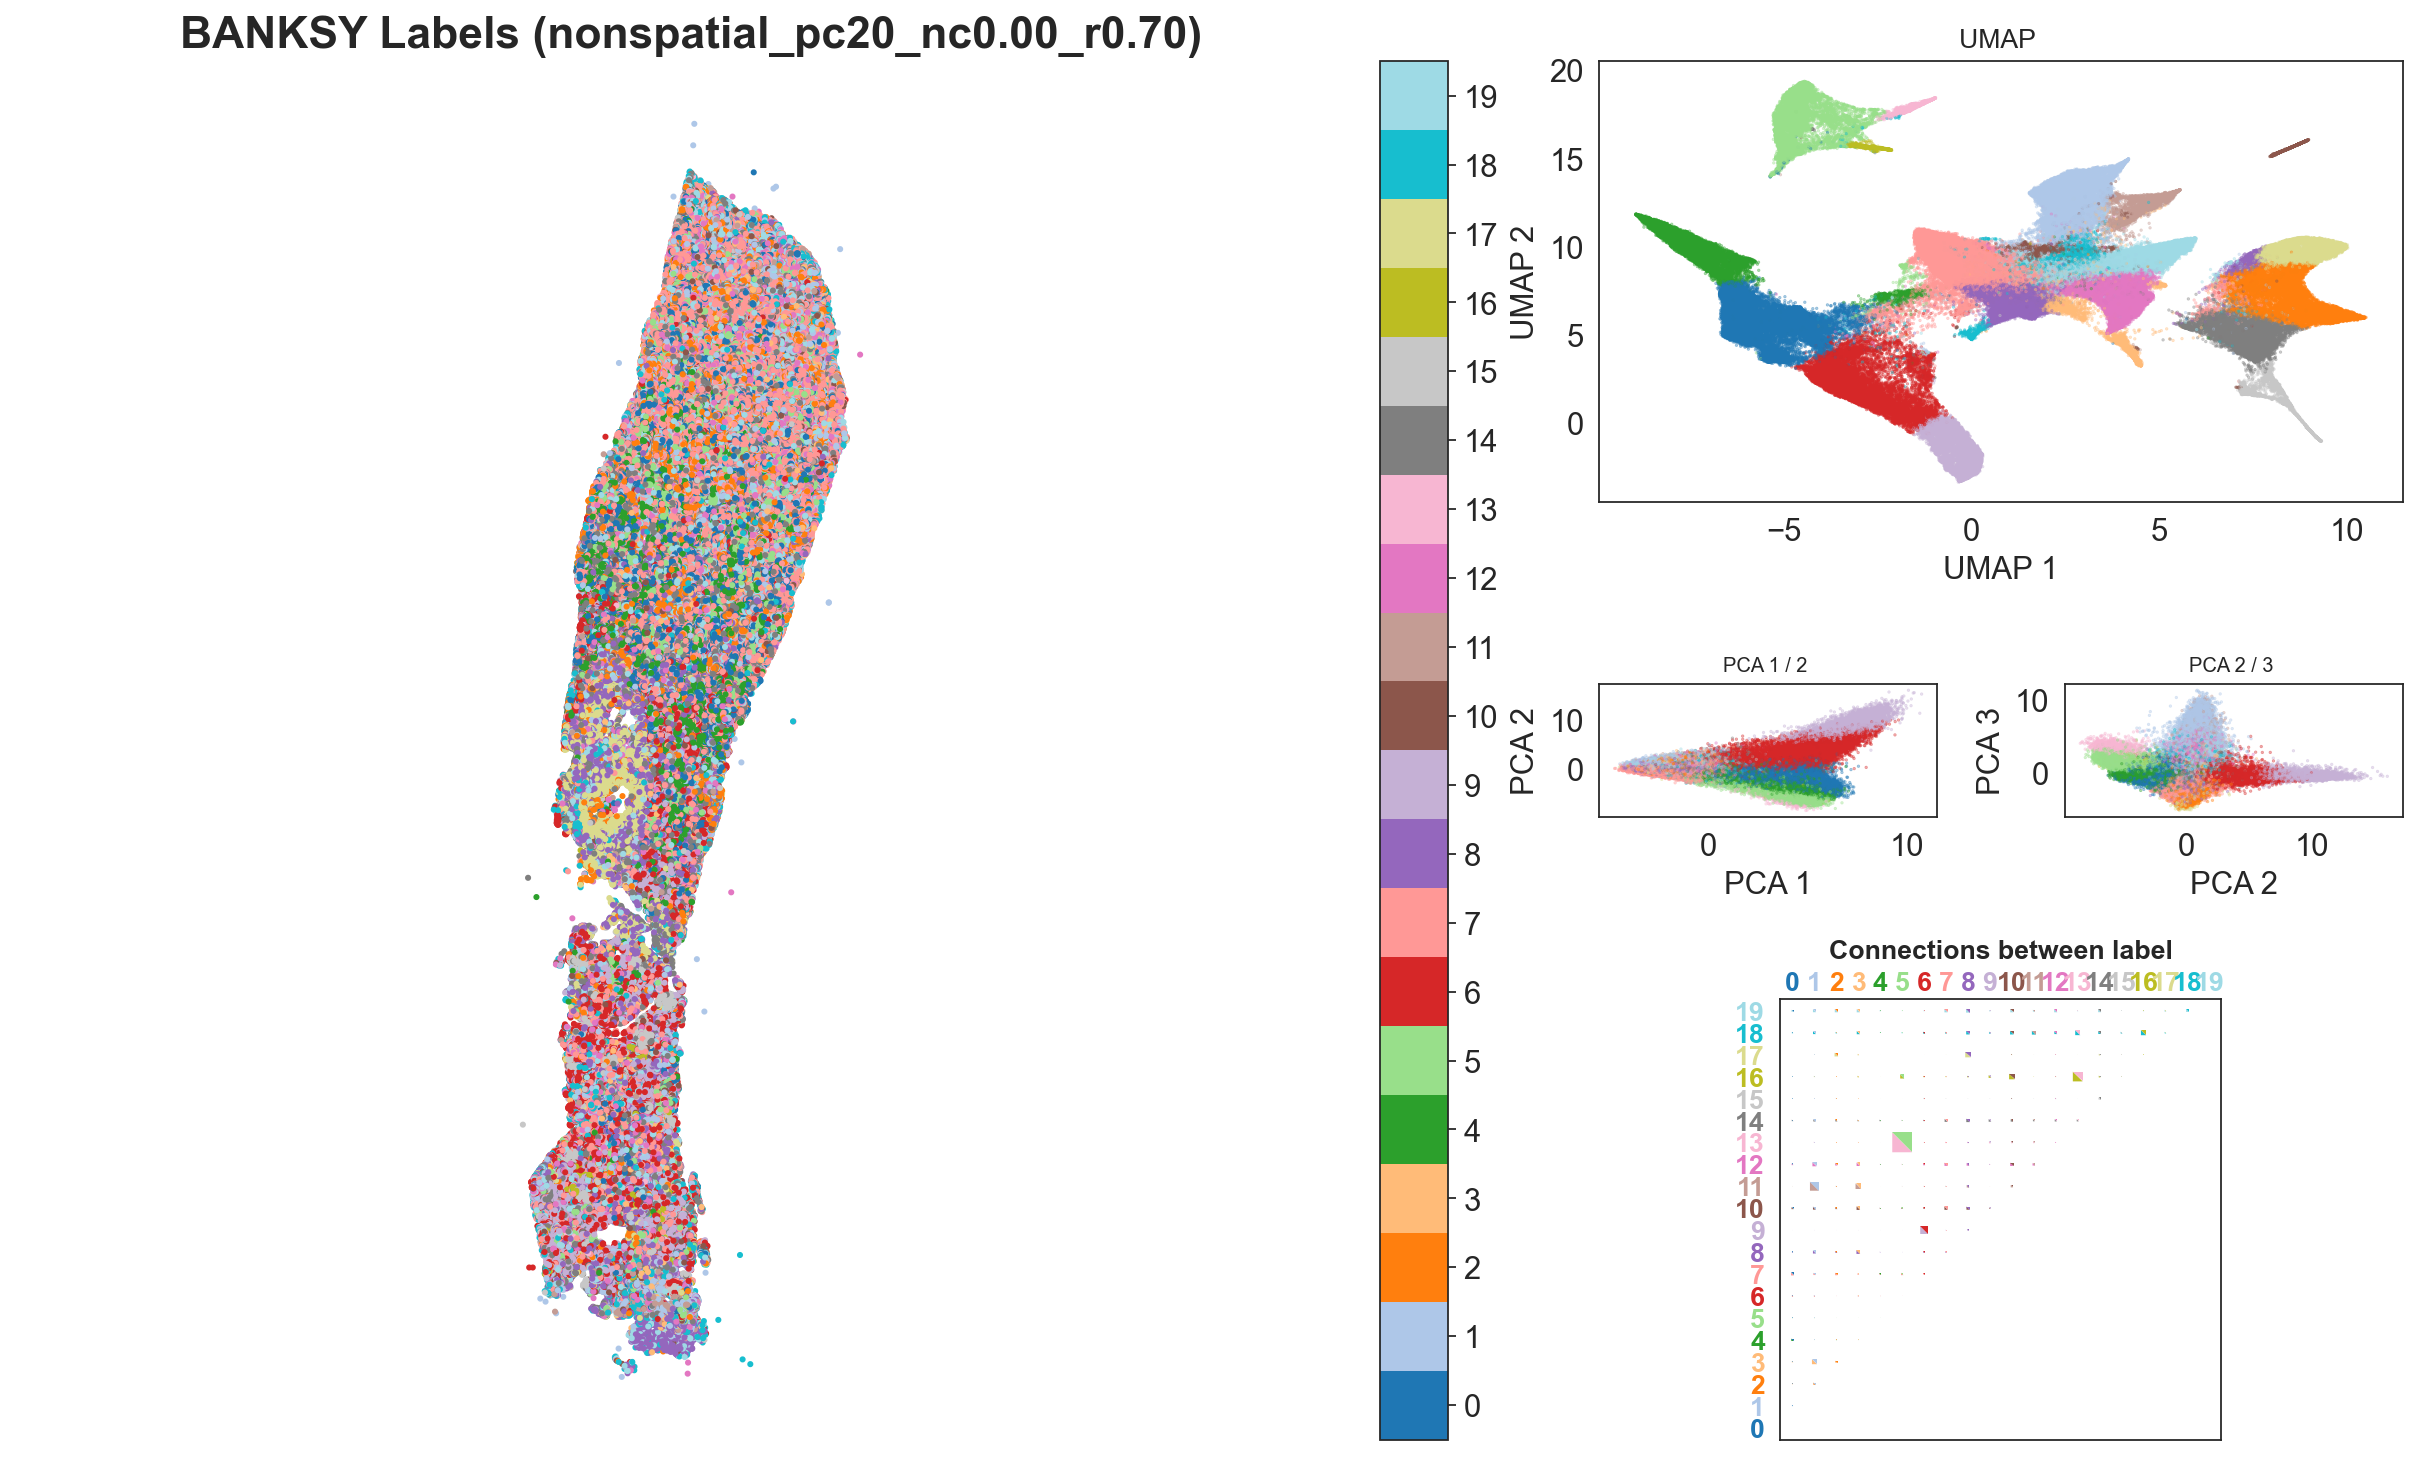

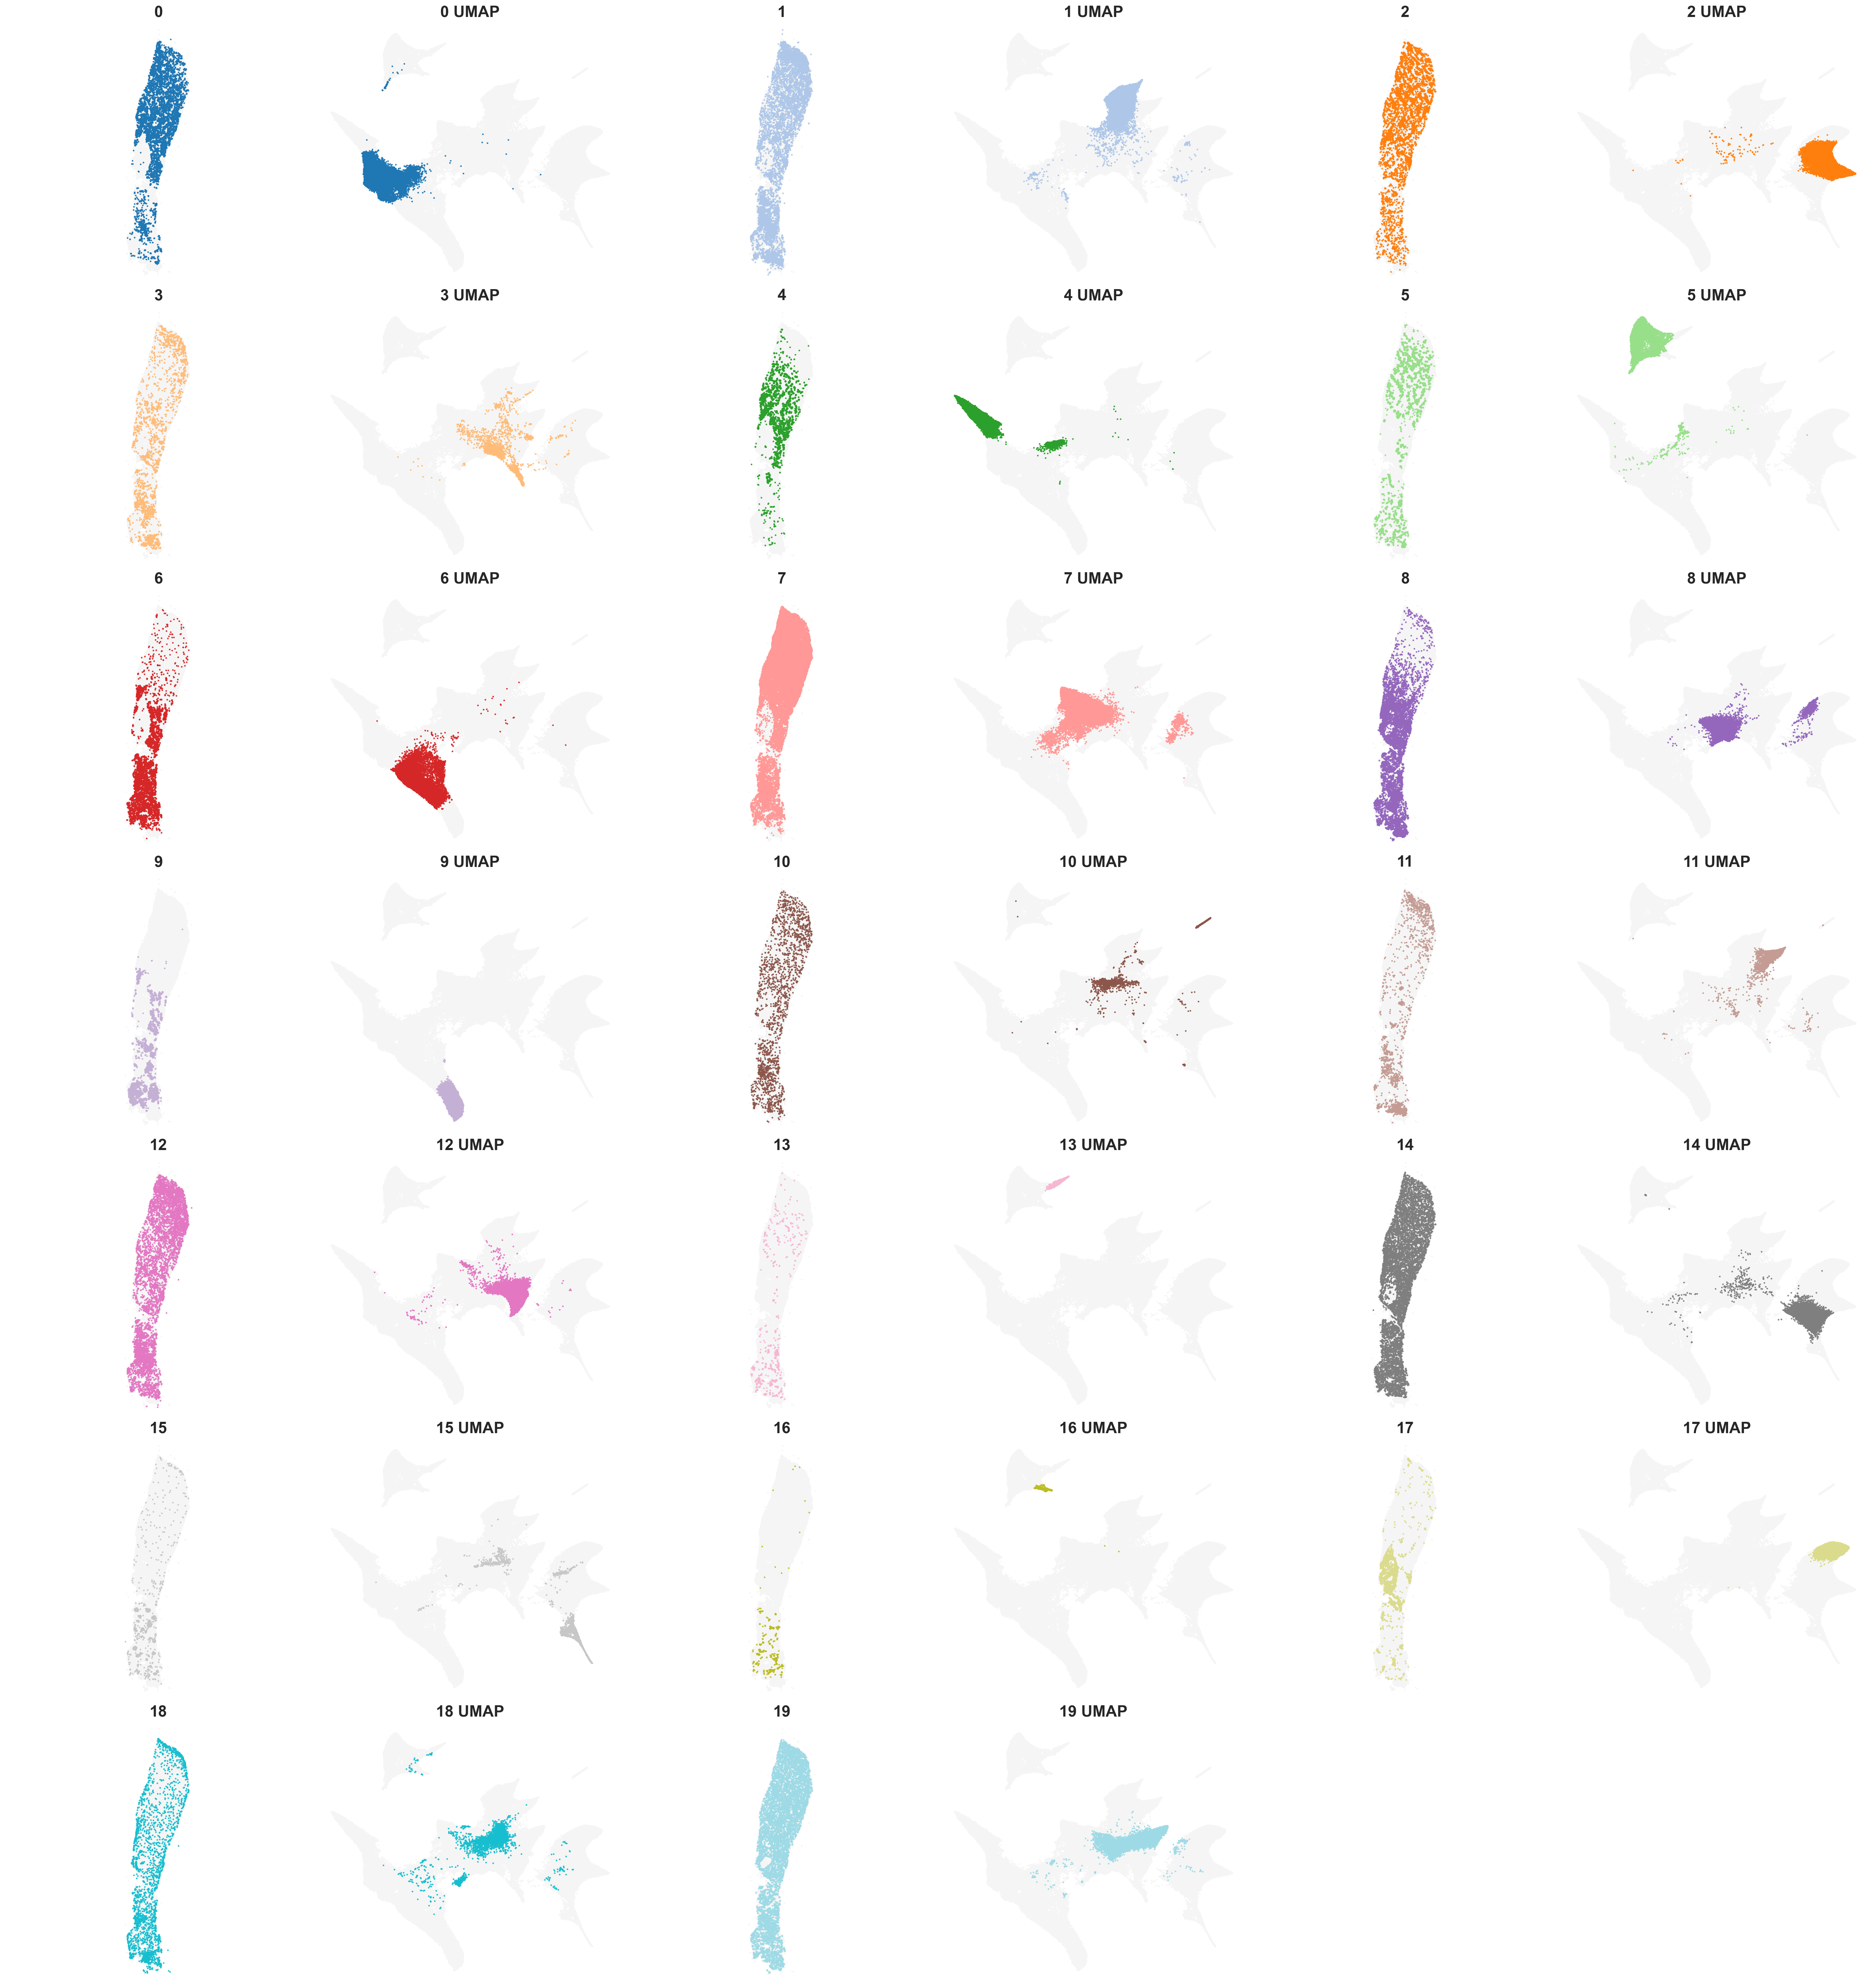

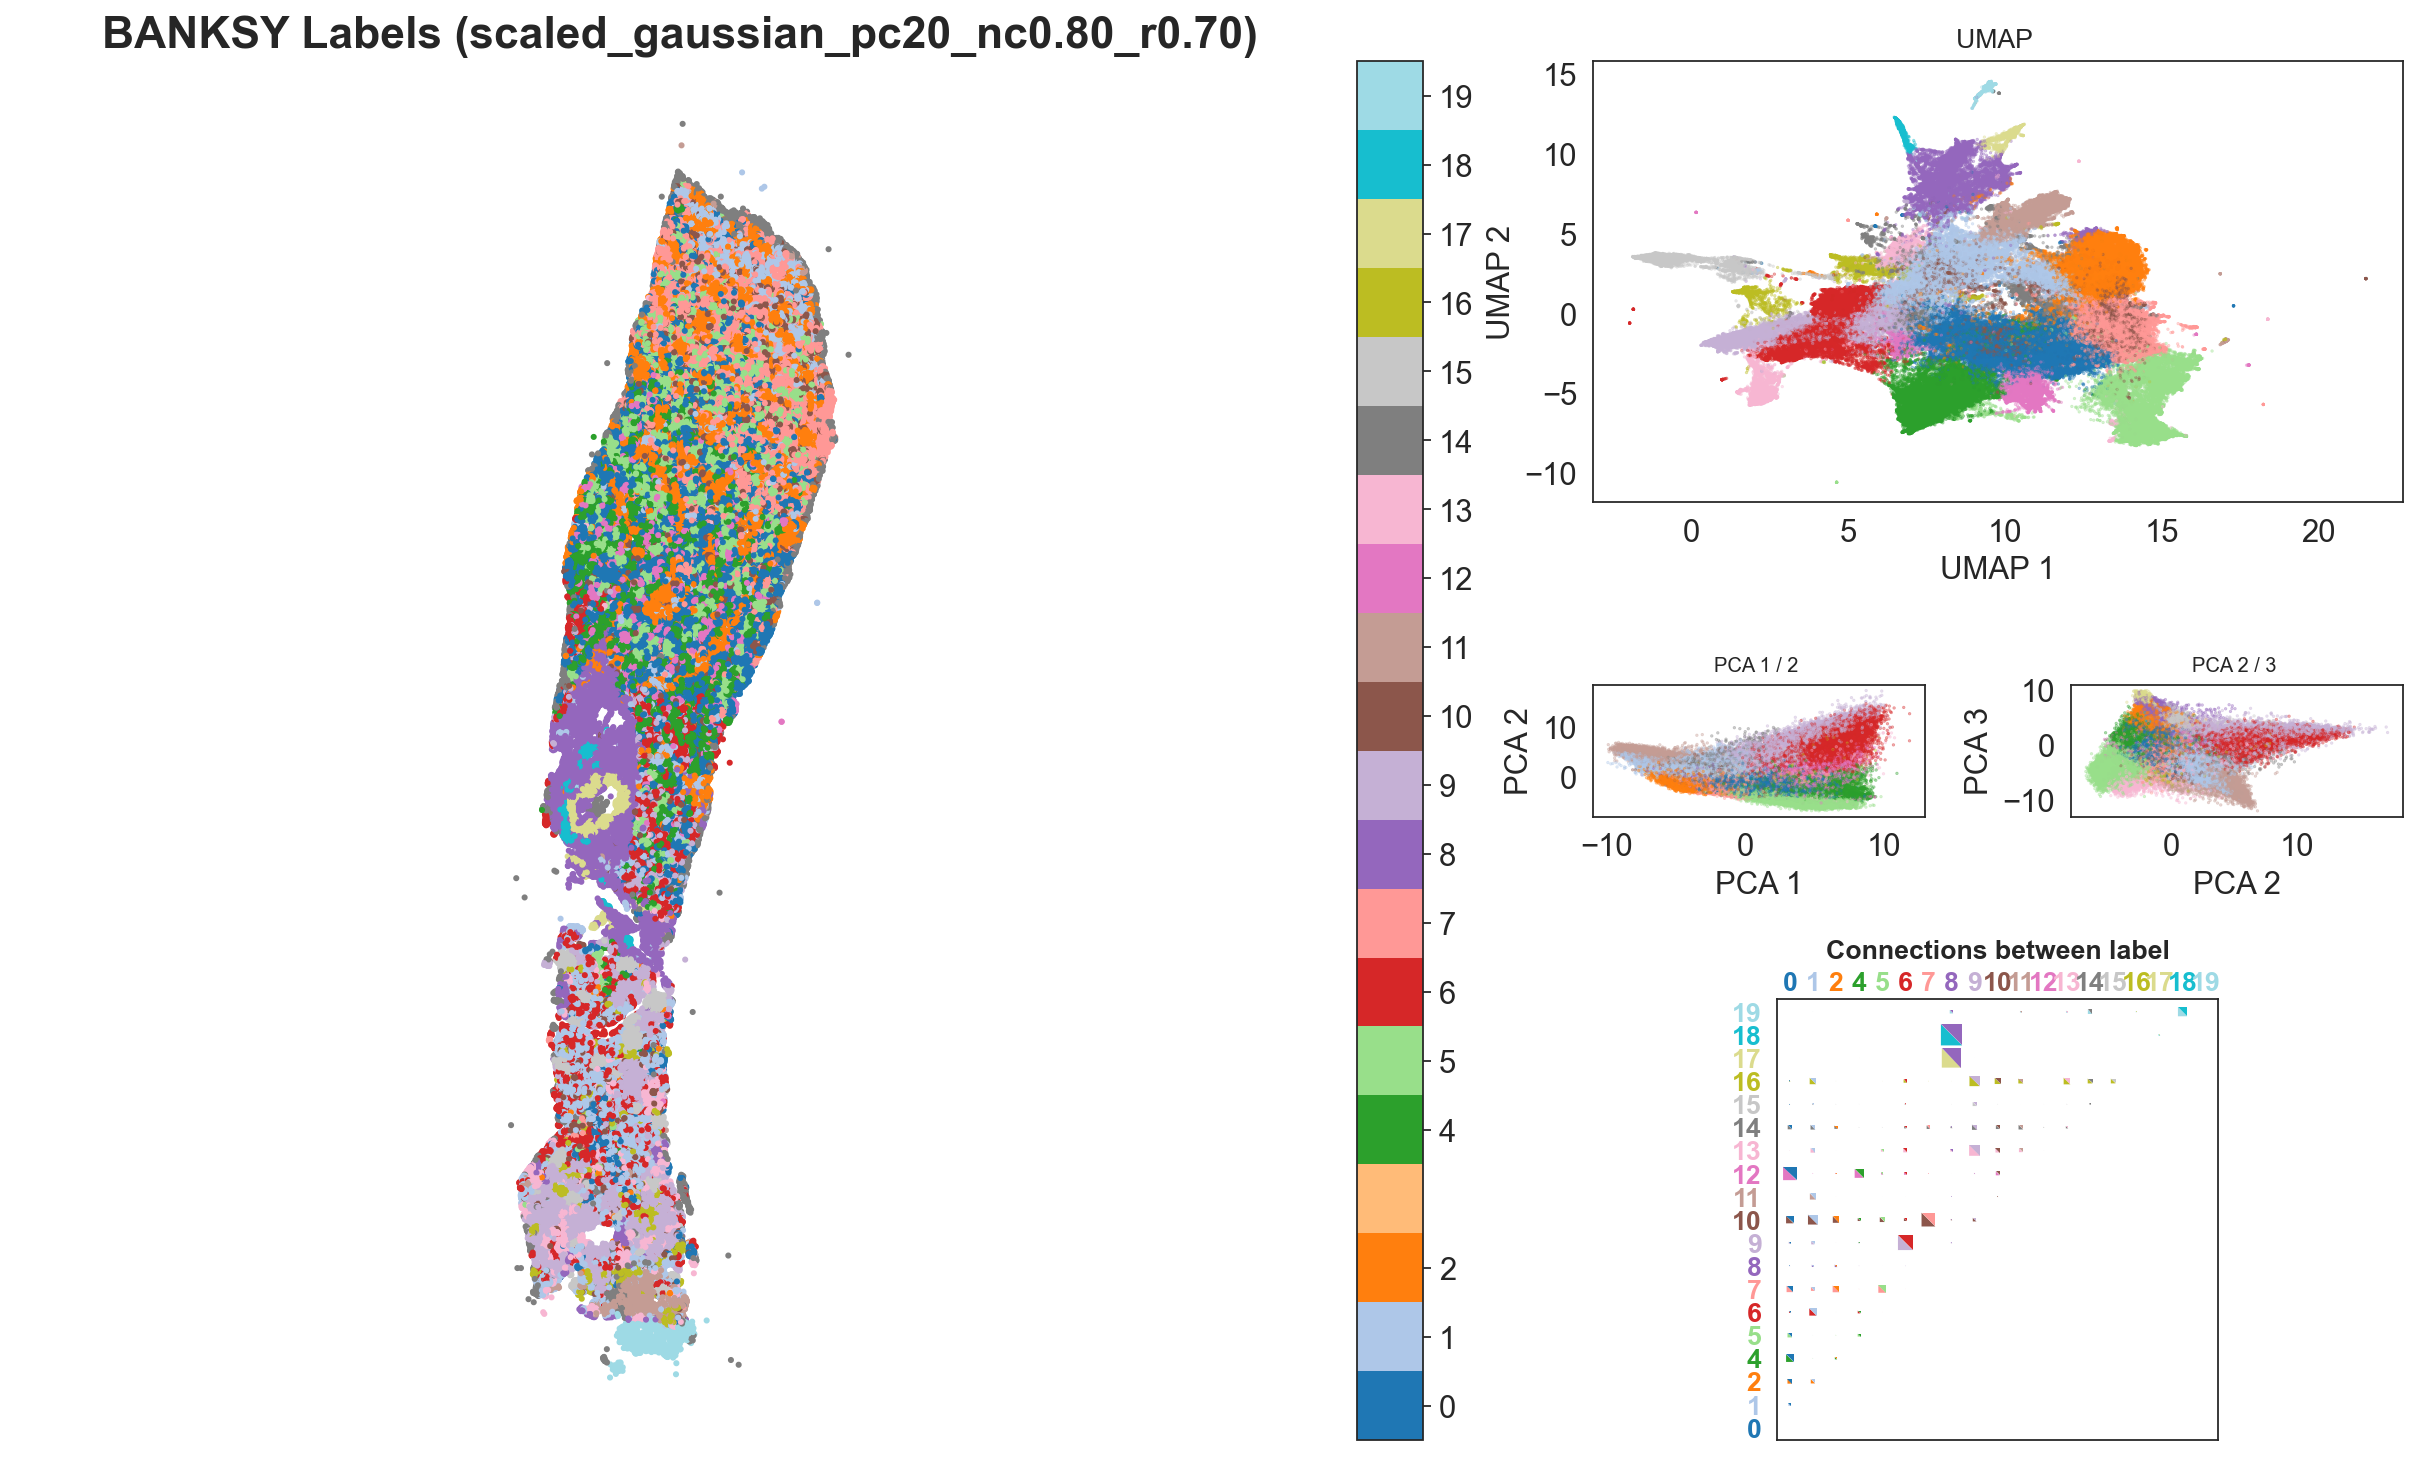

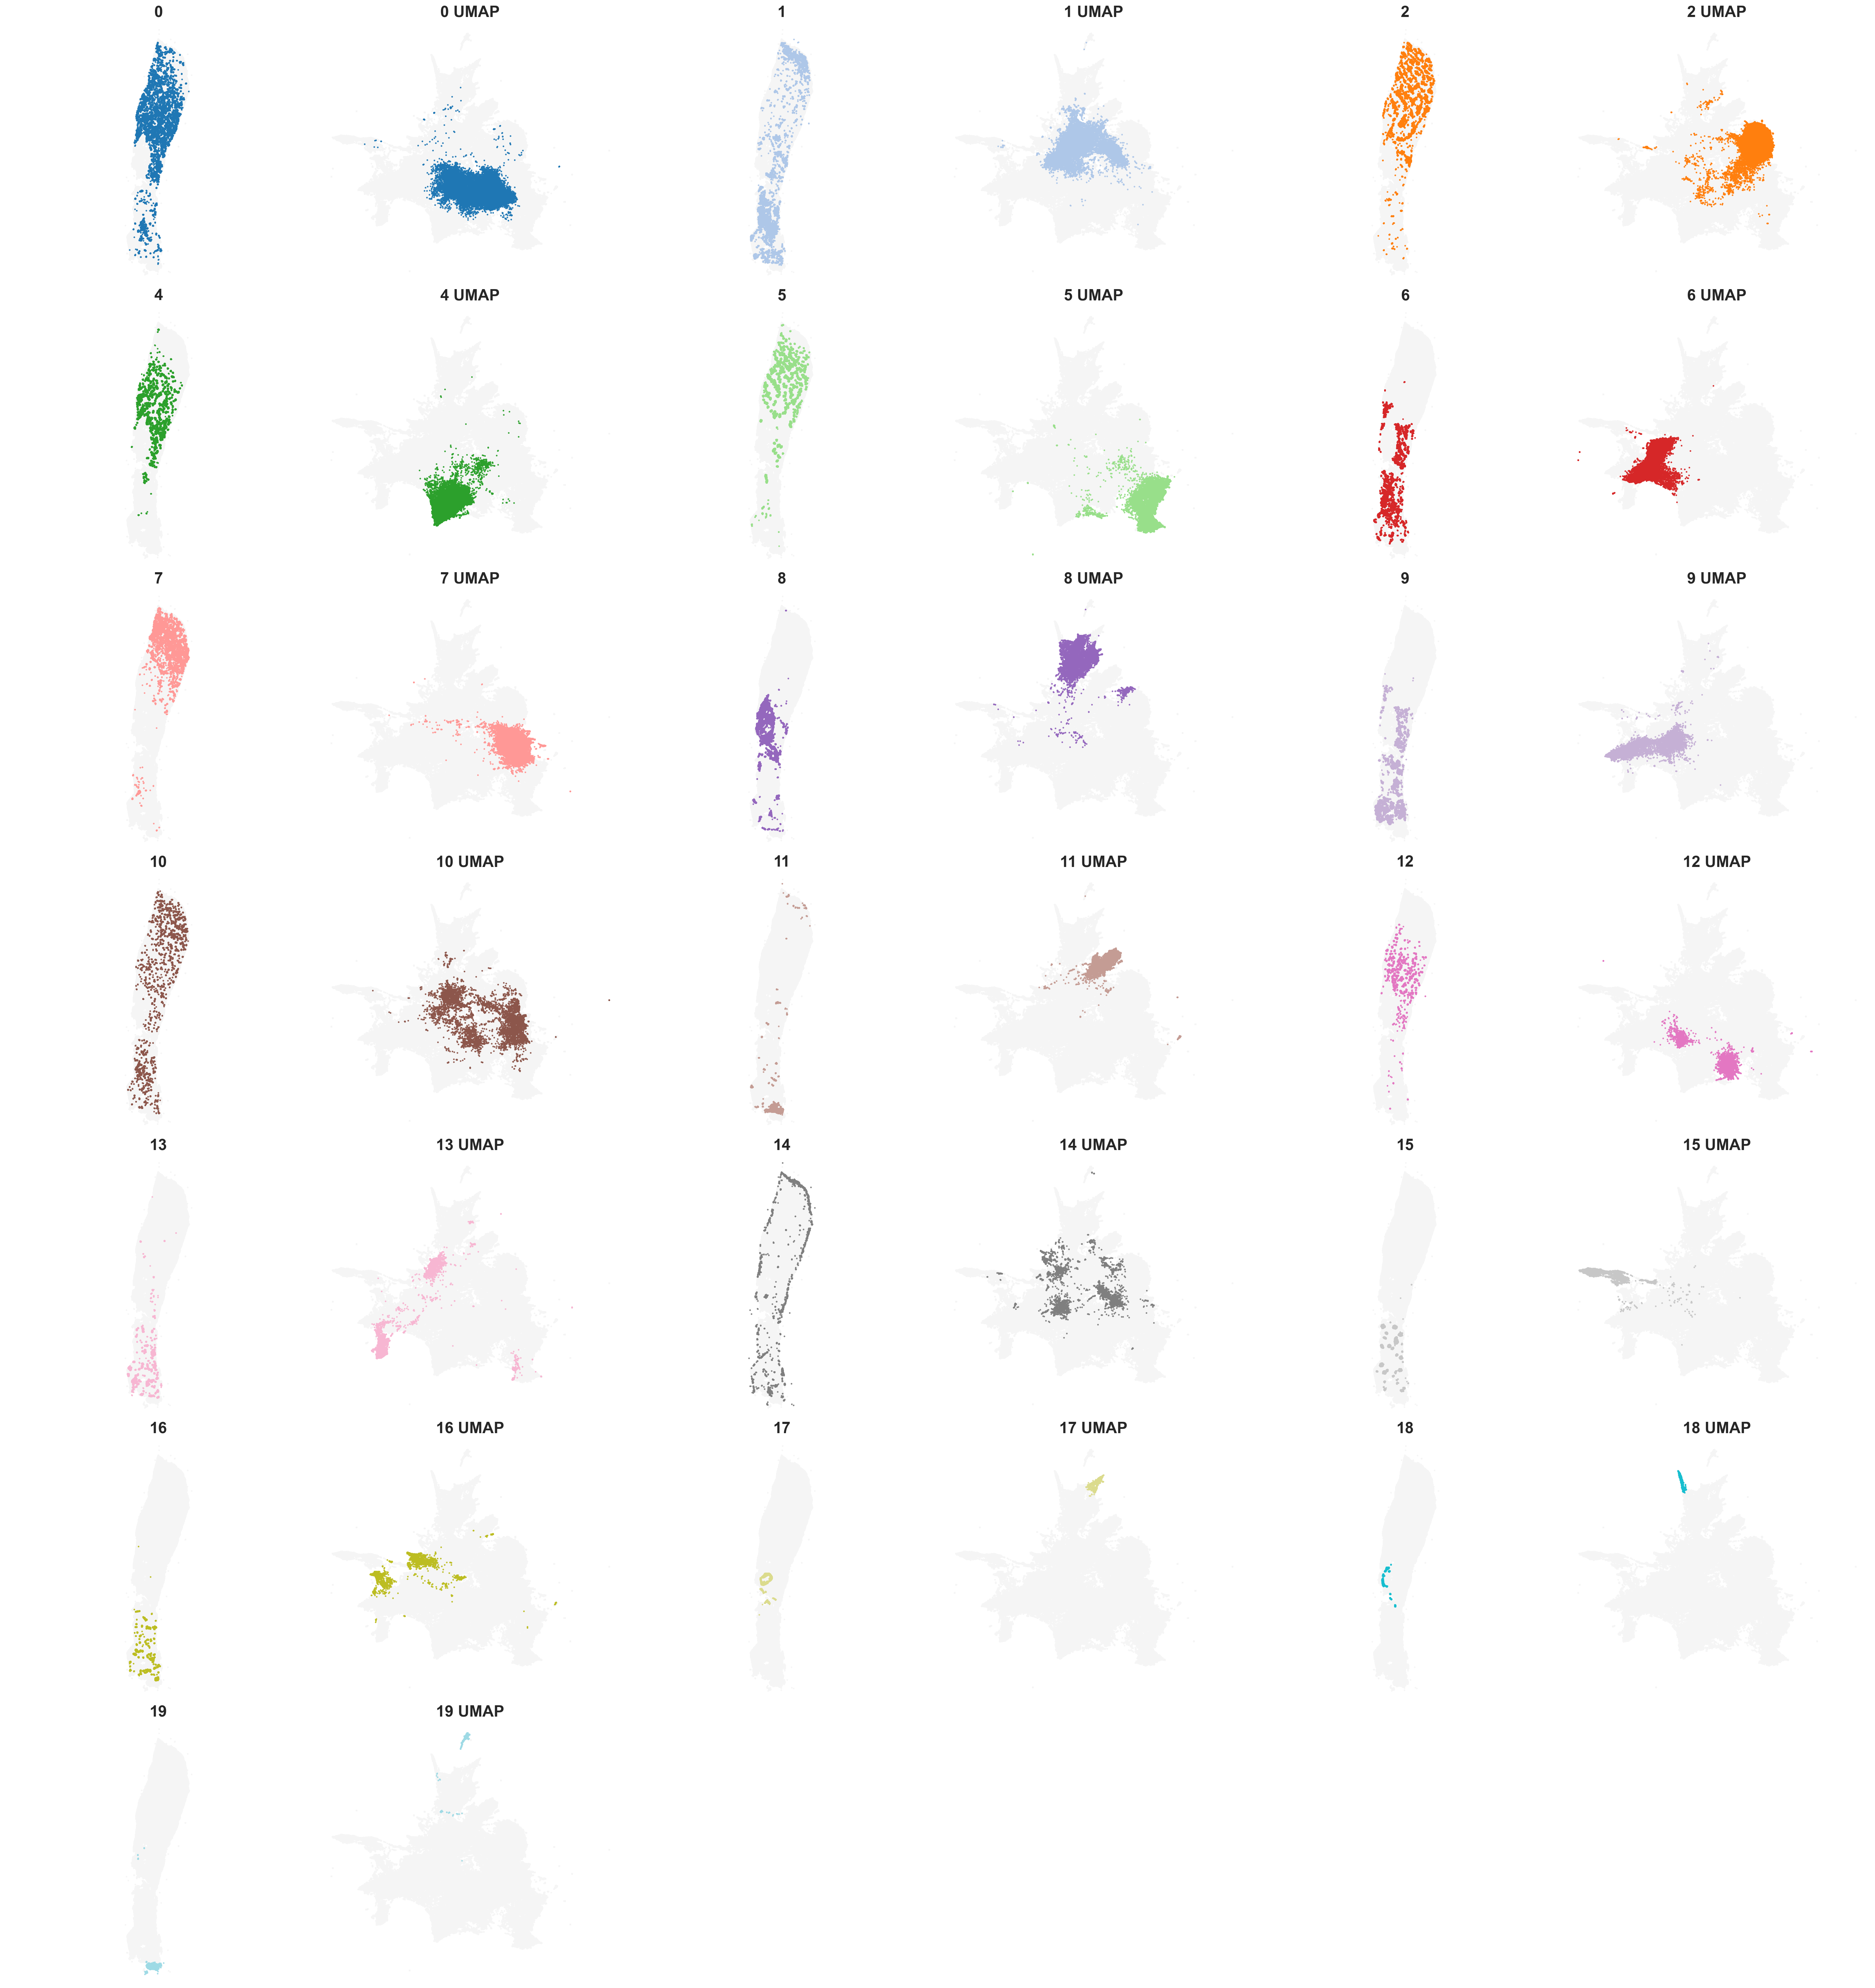

In [13]:
from banksy.plot_banksy import plot_results

# generate plots
c_map =  'tab20' # specify color map
weights_graph =  banksy_dict['scaled_gaussian']['weights'][0]

plot_results(
    results_df,
    weights_graph,
    c_map,
    match_labels = True,
    coord_keys = coord_keys,
    max_num_labels  =  max_num_labels, 
    save_path = "/PATH/temp_png",
    save_fig = True
)


In [14]:
banksy_dict

{'scaled_gaussian': {'weights': {0: <Compressed Sparse Row sparse matrix of dtype 'float64'
   	with 2506980 stored elements and shape (167132, 167132)>,
   1: <Compressed Sparse Row sparse matrix of dtype 'complex128'
   	with 5013960 stored elements and shape (167132, 167132)>},
  'norm_counts_concatenated': <COOrdinate sparse matrix of dtype 'float64'
  	with 54030530 stored elements and shape (167132, 900)>,
  0.8: {'adata': AnnData object with n_obs × n_vars = 167132 × 900
       obs: 'cell_id', 'x_centroid', 'y_centroid', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'unassigned_codeword_counts', 'deprecated_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts', 'leiden', 'v2.subclass.l1', 'v2.subclass.l2', 'sample_id', 'library_id', 'Panel', 'PPI

In [16]:
results_df

decay  lambda_param  num_pcs  \
nonspatial_pc20_nc0.00_r0.70            nonspatial           0.0       20   
scaled_gaussian_pc20_nc0.80_r0.70  scaled_gaussian           0.8       20   

                                   resolution  num_labels  \
nonspatial_pc20_nc0.00_r0.70              0.7          20   
scaled_gaussian_pc20_nc0.80_r0.70         0.7          19   

                                                                              labels  \
nonspatial_pc20_nc0.00_r0.70       Label object:\nNumber of labels: 20, number of...   
scaled_gaussian_pc20_nc0.80_r0.70  Label object:\nNumber of labels: 19, number of...   

                                                                               adata  \
nonspatial_pc20_nc0.00_r0.70       [[[View of AnnData object with n_obs × n_vars ...   
scaled_gaussian_pc20_nc0.80_r0.70  [[[View of AnnData object with n_obs × n_vars ...   

                                                                           relabeled  
nonspatial_pc20_nc0.00_r0.70       Label object:\nNumber of labels: 20, number of...  
scaled_gaussian_pc20_nc0.80_r0.70  Label object:\nNumber of labels: 19, number of...

In [18]:
# extract the BANKSY adata object
banksy_adata = banksy_dict['scaled_gaussian'][0.8]['adata']

# check available clustering labels
print(banksy_adata.obs.columns)


Index(['cell_id', 'x_centroid', 'y_centroid', 'transcript_counts',
       'control_probe_counts', 'control_codeword_counts',
       'unassigned_codeword_counts', 'deprecated_codeword_counts',
       'total_counts', 'cell_area', 'nucleus_area', 'n_genes_by_counts',
       'log1p_n_genes_by_counts', 'log1p_total_counts',
       'pct_counts_in_top_10_genes', 'pct_counts_in_top_20_genes',
       'pct_counts_in_top_50_genes', 'pct_counts_in_top_150_genes', 'n_counts',
       'leiden', 'v2.subclass.l1', 'v2.subclass.l2', 'sample_id', 'library_id',
       'Panel', 'PPID', 'Condition', 'sample_source', 'time_interval',
       'region', 'full_id', 'xcoord', 'ycoord',
       'labels_scaled_gaussian_pc20_nc0.80_r0.70'],
      dtype='object')


In [19]:
banksy_adata.obs['banksy_clusters'] = banksy_adata.obs['labels_scaled_gaussian_pc20_nc0.80_r0.70']

In [24]:
banksy_adata.obs['banksy_clusters']

aaaagppk-1    16
aaaaheci-1    16
aaaaheem-1    16
aaaamjcn-1     6
aaaapcpb-1     6
              ..
oipabmbg-1     0
oipaboid-1     7
oipbfmpj-1     1
oipbgkke-1     1
oipbjhkl-1     7
Name: banksy_clusters, Length: 167132, dtype: category
Categories (19, object): ['0', '1', '10', '11', ..., '6', '7', '8', '9']

## Heatmaps

### Level 1

In [35]:
# create a crosstab of cell type counts across BANKSY clusters with cell type column name
# change v2.subclass.l1 to your cell type column name
crosstab = pd.crosstab(banksy_adata.obs['v2.subclass.l1'], banksy_adata.obs['banksy_clusters'])

# display the first few rows to inspect
crosstab.head()

banksy_clusters     0    1   10  11    12   13  14   15    16  17  18  19  \
v2.subclass.l1                                                              
ATL               669   43   73   2    95    2  12    7     4   1  22   4   
Ad                  2    9    1   5     0    1   9    0     1   0   1   3   
CNT               125  215   41  57    12  932  69   40   146   3   0   6   
DCT               253  350  107  49    59  141  77  190  1169   6   7   1   
DTL              2226   89  241  11  2332    8  26   20    10   7  25   4   

banksy_clusters    2    4    5    6     7    8    9  
v2.subclass.l1                                       
ATL               51  106   68   25   181   28    9  
Ad                10    1    0    2     0    9    2  
CNT               76   36   68   33    80  143   43  
DCT              196   76   53   73   101  159  152  
DTL              175  147  134  137  1273   75   15

In [36]:
# normalize across or down, depending on desired analysis
crosstab_normalized = crosstab.div(crosstab.sum(axis=1), axis=0)

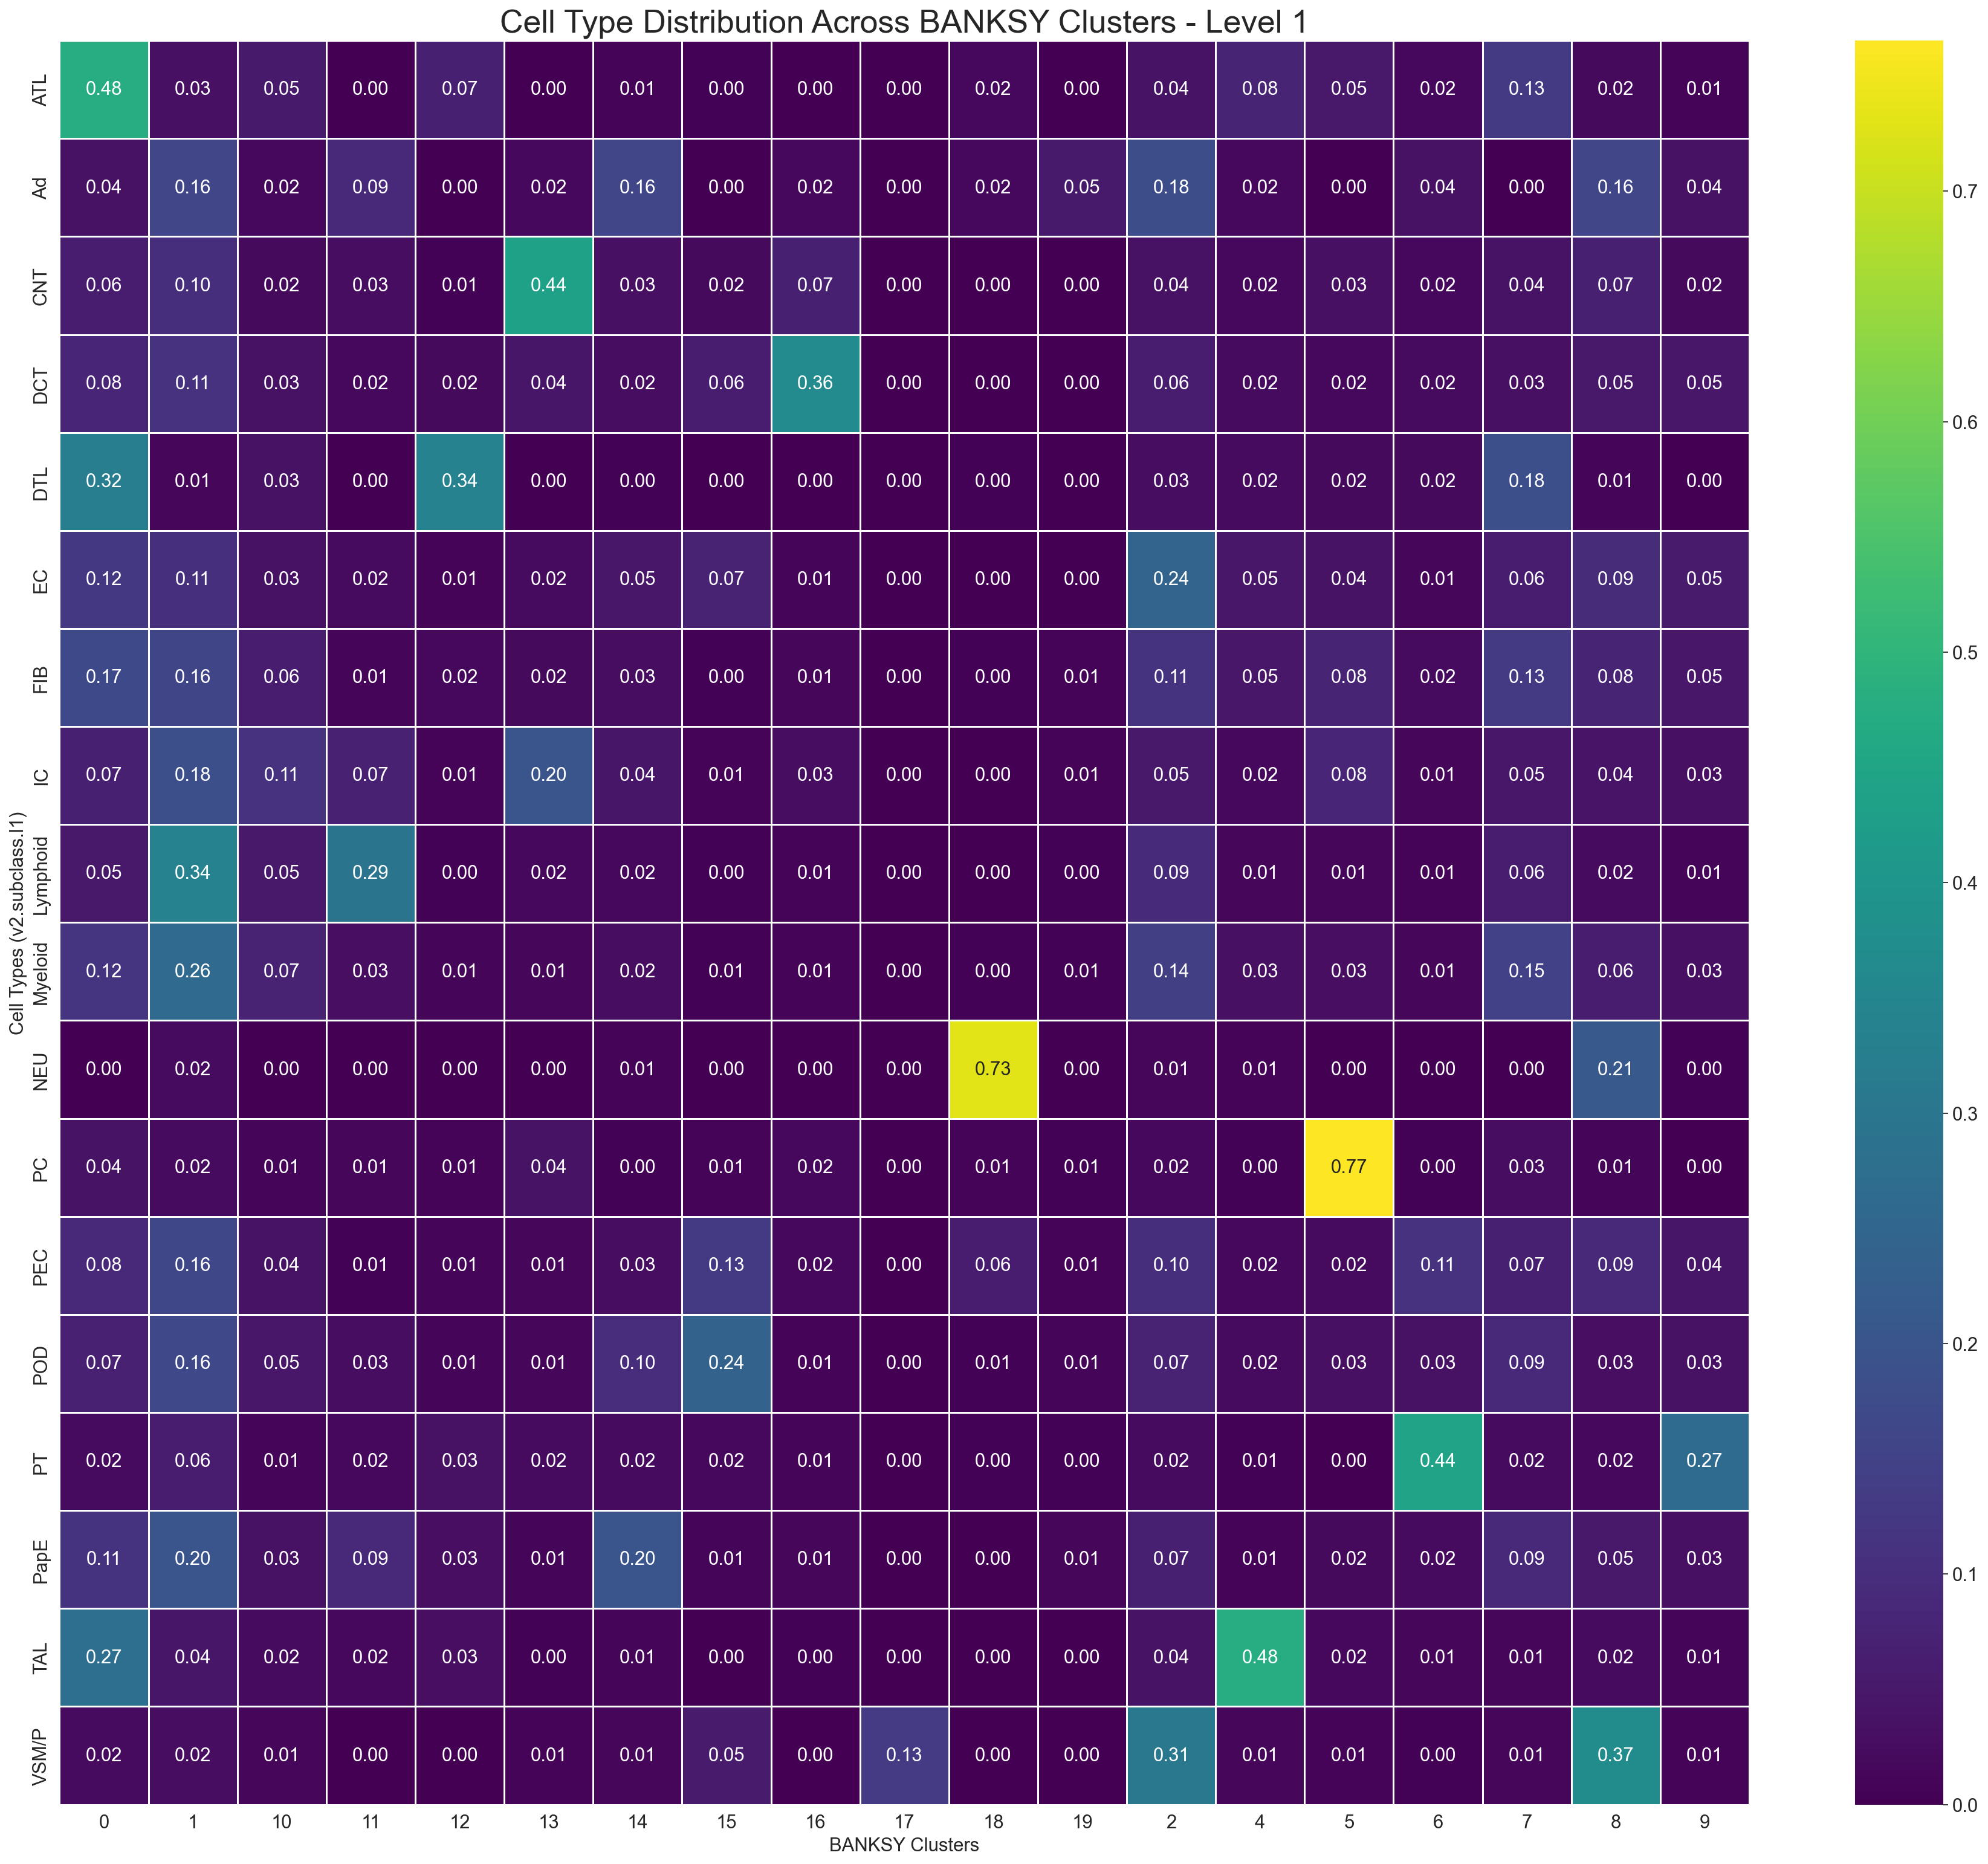

In [37]:
# plot heatmap with clusters on x-axis and cell types on y-axis
plt.figure(figsize=(28, 24))
sns.heatmap(crosstab_normalized, cbar=True, linewidths=0.5, annot=True, fmt=".2f", cmap="viridis")
plt.title('Cell Type Distribution Across BANKSY Clusters - Level 1', fontsize = 24)
plt.xlabel('BANKSY Clusters')
plt.ylabel('Cell Types (v2.subclass.l1)')

# Save the heatmap to a PDF
plt.savefig('/PATH/cell_type_distribution_heatmap_level1.pdf', format='pdf', bbox_inches='tight')

plt.show()